<a href="https://colab.research.google.com/github/rahulvenkat207/CbowModel/blob/main/cbow_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [5]:
# Define vocabulary
vocabulary = ['eat', 'apple', 'orange', 'sapota', 'banana']
vocab_size = len(vocabulary)
embedding_dim = 3  # Number of hidden units (embedding size)
""

''

In [6]:
# Create word-to-index mapping
word_to_idx = {word: idx for idx, word in enumerate(vocabulary)}
idx_to_word = {idx: word for word, idx in word_to_idx.items()}

In [14]:
print(word_to_idx)
print(idx_to_word)

{'eat': 0, 'apple': 1, 'orange': 2, 'sapota': 3, 'banana': 4}
{0: 'eat', 1: 'apple', 2: 'orange', 3: 'sapota', 4: 'banana'}


In [15]:
# Define training data as (context, target) pairs
training_data = [
    ('eat', 'apple'),
    ('eat', 'orange'),
    ('eat', 'banana'),
    ('eat', 'sapota')
] * 1  # Adjust repetition for training

# Convert training data to index-based tensors
training_pairs = [(word_to_idx[context], word_to_idx[target]) for context, target in training_data]
print(training_pairs)


[(0, 1), (0, 2), (0, 4), (0, 3)]


In [ ]:
# Define the Word2Vec model (Skip-gram style)
class Word2Vec(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(Word2Vec, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear = nn.Linear(embedding_dim, vocab_size)

    def forward(self, context_word):
        embedded = self.embeddings(context_word)  # Get word embedding
        output = self.linear(embedded)  # Pass through linear layer
        return output  # Raw scores (logits)

In [8]:
# Initialize model, loss function, and optimizer
model = Word2Vec(vocab_size, embedding_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [9]:
# Training loop
num_epochs = 10000
apple_loss_list = []
orange_loss_list = []
banana_loss_list = []
sapota_loss_list = []

for epoch in range(num_epochs):
    total_loss = 0
    for context_idx, target_idx in training_pairs:
        context_tensor = torch.tensor([context_idx], dtype=torch.long)
        target_tensor = torch.tensor([target_idx], dtype=torch.long)

        optimizer.zero_grad()
        output = model(context_tensor)
        loss = criterion(output, target_tensor)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        if idx_to_word[target_idx] == 'apple':
            apple_loss_list.append(loss.item())
        elif idx_to_word[target_idx] == 'orange':
            orange_loss_list.append(loss.item())
        elif idx_to_word[target_idx] == 'banana':
            banana_loss_list.append(loss.item())
        elif idx_to_word[target_idx] == 'sapota':
            sapota_loss_list.append(loss.item())

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {total_loss}')

Epoch 0, Loss: 6.172819197177887
Epoch 1000, Loss: 5.629101276397705
Epoch 2000, Loss: 5.618820667266846
Epoch 3000, Loss: 5.611949563026428
Epoch 4000, Loss: 5.606403470039368
Epoch 5000, Loss: 5.601842641830444
Epoch 6000, Loss: 5.598069429397583
Epoch 7000, Loss: 5.594922780990601
Epoch 8000, Loss: 5.59227192401886
Epoch 9000, Loss: 5.59001362323761


In [10]:
# Print final output probabilities and errors
print(f"{'Output (yj)':<30}{'Error':<30}")
with torch.no_grad():
    for context_word, target_word in training_data:
        context_idx = torch.tensor([word_to_idx[context_word]], dtype=torch.long)
        output = model(context_idx)
        softmax_output = torch.softmax(output, dim=1).squeeze().numpy()
        error = softmax_output - torch.nn.functional.one_hot(torch.tensor(word_to_idx[target_word]), vocab_size).numpy()
        print(f"p({target_word}|{context_word}) {softmax_output[word_to_idx[target_word]]:<25} {error[word_to_idx[target_word]]:<25}")


Output (yj)                   Error                         
p(apple|eat) 0.24729374051094055       -0.7527062594890594      
p(orange|eat) 0.2488303780555725        -0.7511696219444275      
p(banana|eat) 0.25031307339668274       -0.7496869266033173      
p(sapota|eat) 0.25231990218162537       -0.7476800978183746      


In [11]:
# Print learned word embeddings
print("\nLearned Word Embeddings:")
for word, idx in word_to_idx.items():
    print(f"{word}: {model.embeddings.weight[idx].detach().numpy()}")


Learned Word Embeddings:
eat: [0.6663994  0.50450563 0.83606184]
apple: [-1.4343249   0.7009483  -0.63803685]
orange: [ 1.1430728   0.27217764 -0.4057574 ]
sapota: [-1.1652055  -1.6878955   0.08457845]
banana: [-0.07513247  0.6314373   0.5108932 ]


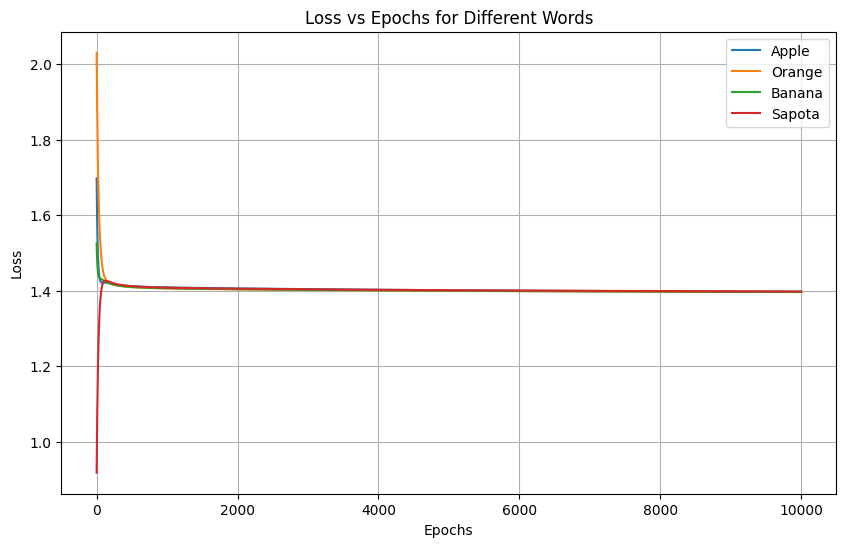

Loss list for all fruits:
Apple: [1.6978204250335693, 1.6785515546798706, 1.660714030265808, 1.6441853046417236, 1.6288549900054932, 1.6146241426467896, 1.6014034748077393, 1.5891125202178955, 1.5776783227920532, 1.5670348405838013, 1.5571221113204956, 1.5478849411010742, 1.539273738861084, 1.531243085861206, 1.523750901222229, 1.516758918762207, 1.5102319717407227, 1.5041377544403076, 1.4984464645385742, 1.4931304454803467, 1.4881643056869507, 1.4835246801376343, 1.4791897535324097, 1.4751391410827637, 1.4713542461395264, 1.467818021774292, 1.4645137786865234, 1.4614267349243164, 1.458542823791504, 1.4558491706848145, 1.4533336162567139, 1.4509844779968262, 1.4487913846969604, 1.4467443227767944, 1.4448342323303223, 1.4430522918701172, 1.4413905143737793, 1.4398412704467773, 1.4383975267410278, 1.4370523691177368, 1.4357998371124268, 1.4346340894699097, 1.4335495233535767, 1.4325411319732666, 1.431604027748108, 1.4307336807250977, 1.429925560951233, 1.4291760921478271, 1.4284814596176

In [12]:
# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(apple_loss_list, label='Apple')
plt.plot(orange_loss_list, label='Orange')
plt.plot(banana_loss_list, label='Banana')
plt.plot(sapota_loss_list, label='Sapota')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for Different Words')
plt.legend()
plt.grid(True)
plt.show()

# Print the loss list for all fruits
print("Loss list for all fruits:")
print("Apple:", apple_loss_list)
print("Orange:", orange_loss_list)
print("Banana:", banana_loss_list)
print("Sapota:", sapota_loss_list)